In [15]:
# from mpl_toolkits.mplot3d import Axes3D
import sys
import os
sys.path.append(os.path.abspath('..'));
tfmat_path=os.path.abspath('../../CA_tfmat');
from utils import *
# print(tfmat_path)              

from mpld3 import plugins
import mpld3
import matplotlib.patches as mpatches
from mpld3 import utils
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
mpld3.enable_notebook()
from IPython.display import HTML
# src='<script src="https://cdn.jsdelivr.net/clipboard.js/1.6.0/clipboard.js"></script>'
# HTML(src)
HTML(tog)

In [16]:
class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id","labels"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        var labels = (this.props.labels);
        obj.elements().on("mousedown",
                          function(d, i){
                          txt=labels[i];
                          window.prompt("You clicked Point "+ i + ", Ctrl+C to copy to clipboard, Rulestring:", txt);
                          
                          
                          });
    }
    """
    
#     obj.elements().on("mousedown",
#                           function(d, i){alert("clicked on points[" + labels[i] + "]");});
    def __init__(self, points,labels=None):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points),
                     "labels":labels};



In [17]:

# log=readcsv('log.csv',header=['1','2','3','4','5'])
import csv
# data=[[]]*5;
def csv2dat(fname):
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    return np.array(dat);
    
def put_patches(ax):
    xf1=np.array([0.12,0.4]);
    yf1=np.array([.12,.21]);
    sigma1=np.array([.025]);
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='green', alpha=0.5,label='Uncond_Comp')


    xf1=np.linspace(.015,.12,50);
    # yf1=np.array([.12,.21]);
    yf1=xf1**0.63/5.7;
    sigma1=.0025+(xf1-0.015)*0.12;
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='yellow', alpha=0.5,label='Cond_Comp')

    pt1=[.65,.18];
    pt2=[.8,.12];
    pts=np.vstack((pt1,pt2));
    xf1=pts[:,0];
    xf1=np.linspace(xf1[0],xf1[1],50)
    yf1=pts[:,1];
    yf1=np.linspace(yf1[0],yf1[1],50)
    sigma1=.0025+(.8-xf1)*0.26;
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='red', alpha=0.5,label='Chaos')

In [18]:
n0=0;
dN=1000;

In [19]:
# dat[146,:];
# dat.shape
# labels
# len(labels) 
# utils.get_id(scatter)
# n
# n0+=50;
# n0+=dN;
# print(n0)
# xs[36]
# data[36,:]
# len(labels)
# print(dat.shape)
# labels[86]
# ys

In [20]:
# print(dat.shape)
# data[248]
n0=4000;

## Landscape of the observed dynamics
* Hover on the point to get the NTCA(non-totalistic cellular automata) rule-string. Click to display the rulestring as a copyable string.
* Click on the bottom-left widgets to Zoom-and-pan

/home/shouldsee/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


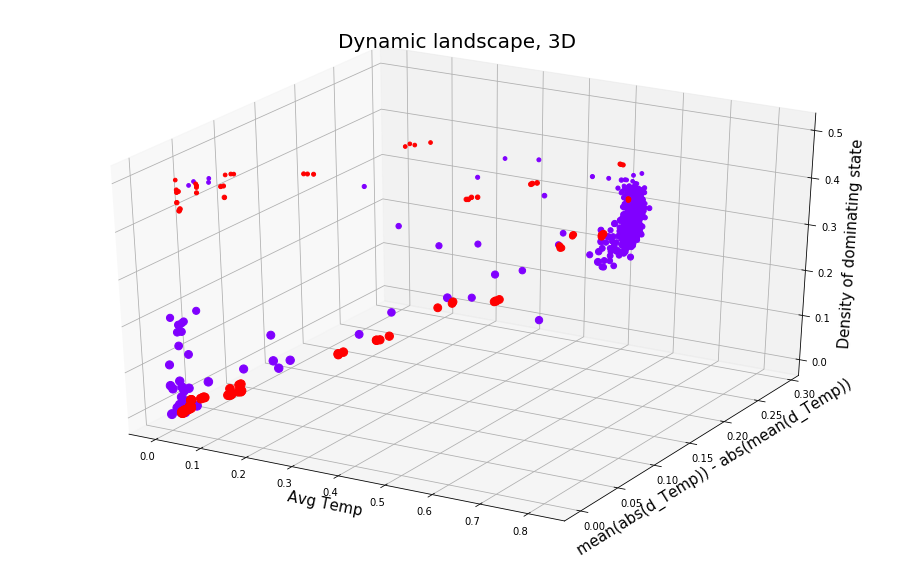

In [21]:
# fig=plt.figure(figsize=[10,5])
# ax=plt.subplot(axisbg='#DDDDDD',)
mpld3.disable_notebook()
dat=csv2dat(tfmat_path+'/logA5')
# dat=csv2dat(tfmat_path+'/log8_cp.csv')
# dat=csv2dat(tfmat_path+'/tst6.csv')
dN=1000;
# dat=np.vstack((dat,csv2dat(tfmat_path+'/tst1.csv')))
data=dat[n0:n0+dN,:]
col=list(0.2 for i in range(data.shape[0
                                      ]));
# data=[];
tst_data=csv2dat(tfmat_path+'/tstA5');
tst_data=tst_data[:100,:];
col=col+list(.8 for i in range(tst_data.shape[0]));
data=np.vstack((data,tst_data));

# data=dat;

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([10,8])
ax.grid(color='white', linestyle='solid')
ax.set_ylim(0,0.38)
ax.set_xlim(0,1)

fig2=plt.figure(figsize=[16,10]);
ax2=plt.subplot(projection='3d')
# plt.subplots_adjust(left=0.4, right=0.9, top=0.9, bottom=0.3)

xs=data[:,3];
xs=xs.astype(np.float)
xs[np.isnan(xs)]=0;
ys=(data[:,4].astype(np.float));
# ys[ys==0]=1;
# ys=np.log(ys);
ys[~np.isfinite(ys)]=0;
zs=(data[:,5].astype(np.float));
zs[~np.isfinite(zs)]=0;

# sizs=list(float(x)/5 for x in data[:,2])
sizs=list((.6-float(x))/.00755 for x in data[:,5])
N = xs.size;
labels=list(data[:,1]);
# labels=data[:,[0,1,3]].T.to_html
put_patches(ax)
sct = ax.scatter(xs,
                 ys,
                 c=col,                
                 s = sizs,
                 alpha=1.0,
#                      label=labels,
                     cmap=plt.cm.rainbow)
# ax.legend()
red_patch = mpatches.Patch(color=plt.cm.rainbow(.98), label='The red data')
pur_patch = mpatches.Patch(color=plt.cm.rainbow(.02), label='The red data')
yel_patch = mpatches.Patch(color=plt.cm.rainbow(.02), label='The red data')
handles, leglabels = ax.get_legend_handles_labels()
handles +=[red_patch,pur_patch];
leglabels +=['reference','sample'];
ax.legend(handles,leglabels)
ax.set_title("Dynamic landscape, 2D projection", size=20)
plugins.connect(fig, 
                plugins.PointLabelTooltip(sct, labels),
#                 plugins.Zoom(enabled=False),
                ClickInfo(sct,labels)
               )
ax.set_xlabel('Avg Temp',size=15);
ax.set_ylabel('mean(abs(d_Temp)) - abs(mean(d_Temp))',size=15);


sct3d = ax2.scatter(xs,
                     ys,
                 zs,
                    c=col,
#                      c=list( 1.*float(i)/N for i in xs),
                     s = sizs,
                     alpha=1.0,
#                      label=labels,
                     cmap=plt.cm.rainbow)
ax2.set_title("Dynamic landscape, 3D", size=20)
ax2.set_xlabel('Avg Temp',size=15);
ax2.set_ylabel('mean(abs(d_Temp)) - abs(mean(d_Temp))',size=15);
ax2.set_zlabel('Density of dominating state',size=15);
mpld3.display(fig)

In [22]:
# data[268]
print(dat.shape[0])

8656


In [23]:
n0=0;

In [24]:
n0+=dN
print(n0)
print(dat.shape[0])

1000
8656


/home/shouldsee/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


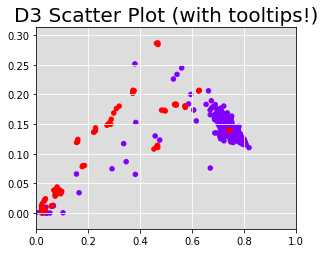

In [25]:
# fig=plt.figure(figsize=[10,5])
# ax=plt.subplot(axisbg='#DDDDDD',)
dat=csv2dat(tfmat_path+'/logA2')
# dat=csv2dat(tfmat_path+'/log8_cp.csv')
# dat=csv2dat(tfmat_path+'/tst6.csv')
dN=1000;
# dat=np.vstack((dat,csv2dat(tfmat_path+'/tst1.csv')))
data=dat[n0:n0+dN,:]
col=list(0.2 for i in range(data.shape[0
                                      ]));
tst_data=csv2dat(tfmat_path+'/tstA2');
tst_data=tst_data[:100,:];
col=col+list(.8 for i in range(tst_data.shape[0]));
data=np.vstack((data,tst_data));

# data=dat;

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
# fig.set_size_inches([10,8])
# ax.set_ylim(-1,20)
ax.set_xlim(0,1)
ax.grid(color='white', linestyle='solid')
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.2)

xs=data[:,0];
xs=xs.astype(np.float)
xs[np.isnan(xs)]=0;
ys=(data[:,1].astype(np.float));
# ys[ys==0]=1;
# ys=np.log(ys);
ys[~np.isfinite(ys)]=0;

sizs=list(float(x)/5 for x in data[:,2])
N = xs.size;
labels=list(data[:,3]);
# labels=data[:,[0,1,3]].T.to_html


sct = ax.scatter(xs,
                 ys,
                c=col,
                 s = sizs,
                 alpha=1.0,
                 cmap=plt.cm.rainbow)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)
plugins.connect(fig, 
                plugins.PointLabelTooltip(sct, labels),
#                 plugins.Zoom(enabled=False),
                ClickInfo(sct,labels)
               )



In [26]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.base_url + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [27]:
# print("NOTEBOOK_FULL_PATH:\n", NOTEBOOK_FULL_PATH)

In [28]:
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read('readlog.ipynb', as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open('test.html', 'w', encoding='utf-8').write(output)
print('HTML successfully exported')

HTML successfully exported
